## Machine Learning Online Class 
## Exercise 5 | Regularized Linear Regression and Bias-Variance
Requires : scipy, scikit-learn

### Introduction

In this exercise, you will implement regularized linear regression and use it to
study models with different bias-variance properties.<br><br>
Bias-variance tradeoff is an important concept in machine learning.<br>
Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data.

### Python imports

In [13]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

### Part 1: Loading and Visualizing Data

#### Load Data

In [14]:
data = loadmat('ex5data1.mat')

In [15]:
X = data['X']
Xtest = data['Xtest']
Xval = data['Xval']
y = data['y']
ytest = data['ytest']
yval = data['yval']

In [16]:
# Number of examples
m = X.shape[0]

#### Plot training data

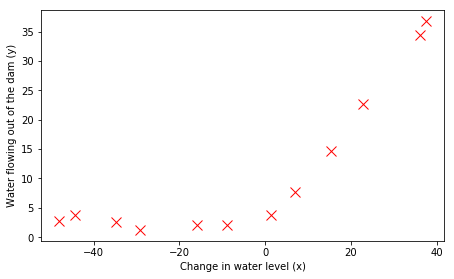

In [17]:
fig = plt.figure(figsize=(7,4))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_xlabel('Change in water level (x)')
axes.set_ylabel('Water flowing out of the dam (y)')
axes.plot(X, y, 'rx', ms =10, linewidth=1.5)

### Part 2: Regularized Linear Regression Cost Function

Regularized linear regression has the following cost function:
$$J(\theta)=\frac{1}{2m}\sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2 + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2$$
where the hypothesis $h_{\theta}(x)$ is given by the linear model :
$$h_{\theta}(x) = \theta^Tx  = \theta_0 + \theta_1 x_1 $$
and $\lambda$ is a regularization parameter which controls the degree of regu larization (thus, help preventing overfitting). The regularization term puts a penalty on the overal cost J. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well. Note that you should not regularize the $\theta_0$ term.

In [18]:
def linearRegCostFunction(theta,X,y,lambda_reg):
    m = len(y)    
    theta = theta.reshape(-1,1)
    
    J = (1 / (2 * m)) * (X.dot(theta) - y).T.dot((X.dot(theta)-y)) + (lambda_reg /(2 * m)) * np.sum(theta[1:,:]**2)
   
    return np.asscalar(J)

In [19]:
print("Cost at theta = [1 1] : {:2.6f}".format(linearRegCostFunction(np.array([1,1]),np.c_[np.ones(m),X],y,1)))
print("This value should be about 303.993192 \n")

Cost at theta = [1 1] : 303.993192
This value should be about 303.993192 



### Part 3: Regularized Linear Regression Gradient

The partial derivative of regularized linear regression's cost for parameter $\theta_j$ is defined as :
$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}\sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$$
$$ \frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{1}{m}\sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)} + \frac{\lambda}{m} \theta_j \hspace{10 mm} \text{for} \hspace{3 mm}j\geqslant 1$$

In [20]:
def linearRegGradFunction(theta,X,y,lambda_reg):
    m = len(y)    
    theta = theta.reshape(-1,1)
    
    grad = (1/m) * X.T.dot(X.dot(theta)-y)
    grad[1:,:] = grad[1:,:] + (lambda_reg / m) * theta[1:,:]
   
    return grad.ravel()

In [21]:
print("Gradient at theta = [1 1] : {}".format(linearRegGradFunction(np.array([1,1]),np.c_[np.ones(m),X],y,1)))
print("This value should be about [-15.303016; 598.250744] \n")

Gradient at theta = [1 1] : [ -15.30301567  598.25074417]
This value should be about [-15.303016; 598.250744] 



### Part 4: Train Linear Regression

In [22]:
def trainLinearReg(X, y, lambda_reg):
    initial_theta = np.zeros((X.shape[1],1))
    
    find_optimal_theta = minimize(fun=linearRegCostFunction, x0=initial_theta,
        method = 'CG', jac=linearRegGradFunction, args = (X,y,lambda_reg), options={'maxiter':200, 'disp':False})
    
    return find_optimal_theta.x    

In [23]:
optimal_theta = trainLinearReg(np.c_[np.ones(m),X],y,0)

#### Plot fit

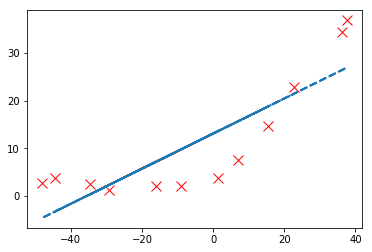

In [24]:
plt.plot(X, y, 'rx', ms =10, linewidth=1.5)
plt.plot(X,np.c_[np.ones(m),X].dot(optimal_theta),'--',linewidth = 2 )

### Part 5: Learning Curve for Linear Regression

We will now implement code to generate the learning curves that will be useful in debugging learning algorithms.<br>
A learning curve plots training and cross validation error as a function of training set size.

To plot the learning curve, we need a training and cross validation set error for different <b>training</b> set sizes. <br>
To obtain different training set sizes, we use different subsets of the original training set X.<br>
Specifically, for a training set size of $i$, we should use the first $i$ examples.<br>
We can use <i>trainLinearReg</i> function to find the $\theta$ parameters. <br>
Note that lambda is passed as a parameter to the learningCurve function.<br>
After learning the $\theta$ parameters, we can compute the error on the training and cross validation sets. <br><br>

Recall that the training error for a dataset is defined as :

$$J_{train}(\theta) = \frac{1}{2m}\sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2 $$

In particular, note that the training error does not include the regularization term. <br>
One way to compute the training error is to use the existing cost function and set $\lambda$ to 0 only when using it to compute the training error and cross validation error. <br>
When you are computing the training set error, make sure you compute it on the training subset (instead of the entire training set). <br>
However, for the cross validation error, you should compute it over the entire cross validation set.

In [25]:
def learningCurve(X, y, Xval, yval, lambda_reg):
    m = X.shape[0]
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    
    for i in range(m):
        theta = trainLinearReg(X[:i+1,:],y[:i+1,:],lambda_reg)        
        error_train[i] = linearRegCostFunction(theta, X[:i+1,:],y[:i+1,:],0)
        error_val[i] = linearRegCostFunction(theta, Xval,yval,0)
        
    return(error_train, error_val)
        

In [26]:
(error_train, error_val) = learningCurve(np.c_[np.ones(m),X], y, np.c_[np.ones(Xval.shape[0]),Xval], yval, 0)

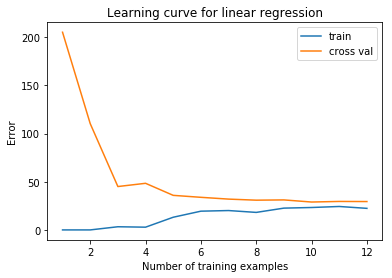

In [27]:
plt.plot(np.arange(1,m+1), error_train, label ='train')
plt.plot(np.arange(1,m+1), error_val, label ='cross val')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()

Both the train error and cross validation error are high when the number of training examples is increased. This reflects a <b><i>high bias</i></b> problem in the model - the linear regression model is too simple and is unable to fit our dataset well.

### Part 6: Feature Mapping for Polynomial Regression

The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias). <br>
In this part of the exercise, we will address this problem by adding more features.

#### Feature engineering -  add polynominal features
We use sklearn PolynomialFeatures class

In [28]:
p = 8
poly = PolynomialFeatures(p) #creates an instance of degree 8
X_poly = poly.fit_transform(X) #transforms X, intercept is added by default
X_poly_test = poly.fit_transform(Xtest)
X_poly_val = poly.fit_transform(Xval)

#### Normalize features
Normalize features to zero mean and unit variance 
(we don't use sklearn scale method which uses a biased estimator of stddev) 

In [29]:
def featureNormalize(X):
    mu = X.mean(axis = 0)
    sigma = X.std(axis = 0, ddof = 1) # We specifiy degrees of freedom = 1 to retrieve an unbiased estimator of stddev
    X_norm = (X - mu) / sigma
    
    return (X_norm, mu, sigma)    

In [30]:
(X_poly[:,1:], mu, sigma) = featureNormalize(X_poly[:,1:])
(X_poly_test[:,1:], mu_test, sigma_test) = featureNormalize(X_poly_test[:,1:])
(X_poly_val[:,1:], mu_val, sigma_val) = featureNormalize(X_poly_val[:,1:])

### Part 7: Learning Curve for Polynomial Regression

#### Check training fit with polynomial regression

In [31]:
lambda_reg = 0
theta_poly = trainLinearReg(X_poly,y,lambda_reg)

In [32]:
def plotFit(min_x, max_x, mu, sigma, theta, p):
    # We plot a range slightly bigger than the min and max values to get
    # an idea of how the fit will vary outside the range of the data points 
    theta = theta.reshape(-1,1)
    
    xrange = np.arange(min_x - 15, max_x + 25, 0.05)
    x_poly = PolynomialFeatures(p).fit_transform(xrange.reshape(-1,1))
    
    x_poly[:,1:] = (x_poly[:,1:] - mu) / sigma
    
    plt.plot(xrange, x_poly.dot(theta))

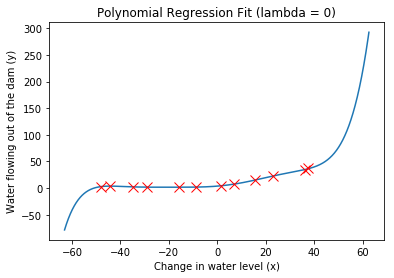

In [33]:
plotFit(X.min(),X.max(),mu,sigma,theta_poly,8)
plt.plot(X, y, 'rx', ms =10, linewidth=1.5)
plt.title('Polynomial Regression Fit (lambda = {})'.format(lambda_reg))
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

#### Learning curve

In [34]:
(error_train, error_val) = learningCurve(X_poly, y, X_poly_val, yval, 0)

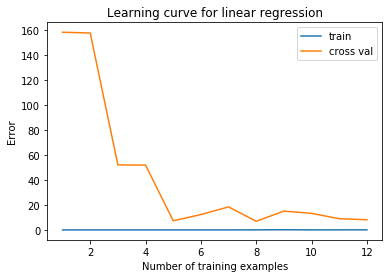

In [35]:
plt.plot(np.arange(1,m+1), error_train, label ='train')
plt.plot(np.arange(1,m+1), error_val, label ='cross val')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()

Training error remains low and there is a gap between the training and cross validation errors, indicating a <b><i>high variance </b></i> problem.

### Selecting lambda using the cross validation set (hyperparameter tuning)

In [36]:
def validationCurve(X, y, Xval, yval):
    #Selected values of lambda
    lambda_vec = np.array([0,0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    
    n = lambda_vec.shape[0]
    
    error_train = np.zeros(n)
    error_val = np.zeros(n)
    
    for i in range(n):
        lambda_reg = lambda_vec[i]
        theta = trainLinearReg(X,y,lambda_reg)
        error_train[i] = linearRegCostFunction(theta,X,y,0)
        error_val[i] = linearRegCostFunction(theta,Xval,yval,0)
    
    return (lambda_vec, error_train, error_val)

In [37]:
(lambda_vec, error_train, error_val) = validationCurve(X_poly, y, X_poly_val, yval)

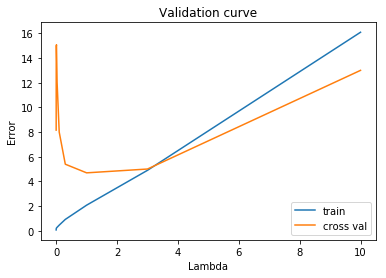

In [38]:
plt.plot(lambda_vec, error_train, label ='train')
plt.plot(lambda_vec, error_val, label ='cross val')
plt.title('Validation curve')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend()

### END